In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [6]:
df.isna().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               24 non-null     int64  
 1   month              24 non-null     int64  
 2   interest_rate      24 non-null     float64
 3   unemployment_rate  24 non-null     float64
 4   index_price        24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [9]:
df.drop(columns=['year','month'],inplace=True)

<Axes: >

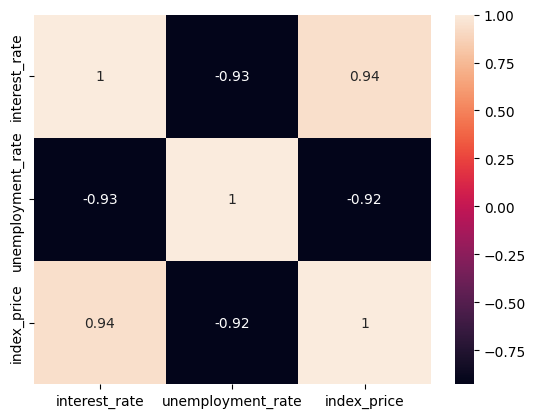

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
# Independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [18]:
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
y_pred = regression.predict(X_test)

In [20]:
#R2 score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8254940547158576

In [22]:
print("Coefficient or Slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient or Slope :  [  86.63351334 -114.04857249]
Intercept :  1059.4210526315792


In [23]:
# Performance metrices
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [25]:
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  6957.105303258833
MAE :  71.71878409976625
RMSE :  83.40926389351985


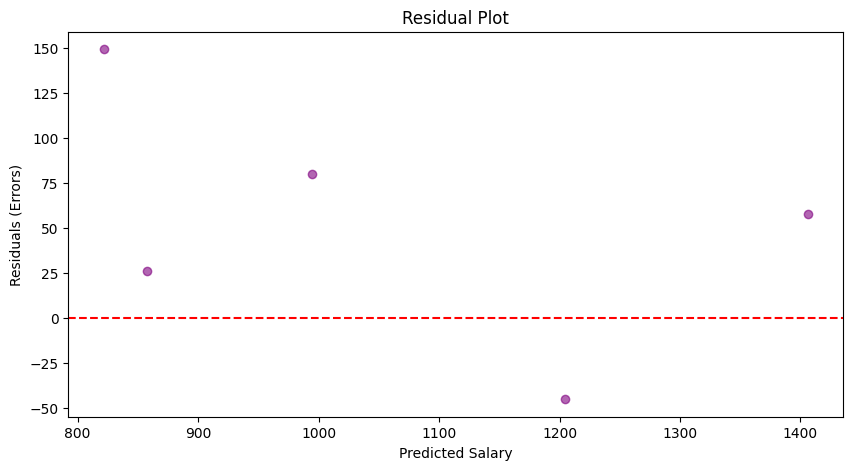

In [26]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals (Errors)')
plt.show()

In [27]:
# Predicting on new data
print("Interest rate(2.75) and unemployment rate(5.25) so predicted index price is : ",regression.predict(scaler.transform([[2.75,5.25]])))

Interest rate(2.75) and unemployment rate(5.25) so predicted index price is :  [1424.41301637]


d:\ML-Fundamentals-Lab\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
